In [1]:
#setup 
import numpy as np
import pandas as pd 
from tkinter import filedialog
import matplotlib.pyplot as plt
import os 
import glob
import csv
import itertools

In [2]:
#Dialog box 
initialdir='/Desktop/UROP' #assign a directory 
filepaths= filedialog.askopenfilename(multiple=True, initialdir=initialdir,title='Select a File', filetypes=(("ASC Files",".ASC"),))
#^opens dialogbox to select multiple files that end in .ASC
print(filepaths)

('/home/jasonk0401/Desktop/UpdatedProject/ALZ3UM.ASC', '/home/jasonk0401/Desktop/UpdatedProject/GAZ3UM.ASC', '/home/jasonk0401/Desktop/UpdatedProject/INZ3UM.ASC', '/home/jasonk0401/Desktop/UpdatedProject/ZNO3UM3.ASC')


In [3]:
#shorten filepaths to just filenames 
filenames = []
for path in filepaths:
    name = path[40:].strip() 
    name2 = name[:].strip() 
    filenames.append(name2)
print(filenames)

['ALZ3UM.ASC', 'GAZ3UM.ASC', 'INZ3UM.ASC', 'ZNO3UM3.ASC']


In [4]:
#Compliling Files Into List of Lists
df=pd.DataFrame()
for element in filenames:
    df2=pd.read_csv(element, usecols=['Wavelength','Intensity'])
    df=pd.concat([df,df2], axis=1)
print(df)

     Wavelength  Intensity  Wavelength  Intensity  Wavelength  Intensity  \
0     531.77081   393210.0   531.77081   393210.0   531.77081   393210.0   
1     531.84149   393210.0   531.84149   393210.0   531.84149   393210.0   
2     531.91216   243432.0   531.91216   197919.0   531.91216   214121.0   
3     531.98284    26123.0   531.98284    22679.0   531.98284    23412.0   
4     532.05351    10128.0   532.05351    10607.0   532.05351    11086.0   
..          ...        ...         ...        ...         ...        ...   
571   571.76997     3334.0   571.76997     1052.0   571.76997     1472.0   
572   571.83939     3487.0   571.83939     1002.0   571.83939     1486.0   
573   571.90881     3442.0   571.90881     1058.0   571.90881     1524.0   
574   571.97823     3416.0   571.97823     1118.0   571.97823     1502.0   
575   572.04764     3723.0   572.04764     1317.0   572.04764     1794.0   

     Wavelength  Intensity  
0     531.77081   393210.0  
1     531.84149   393210.0  


Text(0, 0.5, 'Intensity(a.u.)')

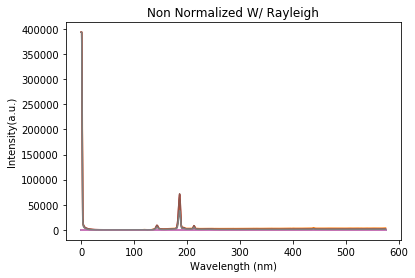

In [5]:
#Plotting graph non normalized with rayleigh line
plt.plot(df)
plt.title('Non Normalized W/ Rayleigh')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity(a.u.)')

In [6]:
#Skip first 300 rows to get rid of rayleigh line
dp=df.drop(df.index[0:250])
#leaves rows as 250-575
#reset index becasuse it causes problems later when concating 
dp.reset_index(drop=True, inplace=True)
print(dp)

     Wavelength  Intensity  Wavelength  Intensity  Wavelength  Intensity  \
0     549.37171     2743.0   549.37171      846.0   549.37171     1213.0   
1     549.44183     2591.0   549.44183      868.0   549.44183     1104.0   
2     549.51196     2668.0   549.51196      817.0   549.51196     1170.0   
3     549.58208     2657.0   549.58208      760.0   549.58208     1094.0   
4     549.65220     2631.0   549.65220      798.0   549.65220     1076.0   
..          ...        ...         ...        ...         ...        ...   
321   571.76997     3334.0   571.76997     1052.0   571.76997     1472.0   
322   571.83939     3487.0   571.83939     1002.0   571.83939     1486.0   
323   571.90881     3442.0   571.90881     1058.0   571.90881     1524.0   
324   571.97823     3416.0   571.97823     1118.0   571.97823     1502.0   
325   572.04764     3723.0   572.04764     1317.0   572.04764     1794.0   

     Wavelength  Intensity  
0     549.37171     1140.0  
1     549.44183     1116.0  


Text(0, 0.5, 'Intensity(a.u.)')

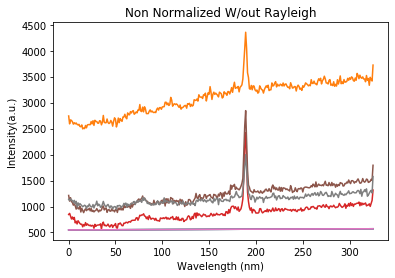

In [7]:
#Plotting graph non normalized without rayleigh line
plt.plot(dp)
plt.title('Non Normalized W/out Rayleigh')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity(a.u.)')

In [8]:
#just intensity 
di=dp.drop(columns=['Wavelength'])
print(di)

     Intensity  Intensity  Intensity  Intensity
0       2743.0      846.0     1213.0     1140.0
1       2591.0      868.0     1104.0     1116.0
2       2668.0      817.0     1170.0     1148.0
3       2657.0      760.0     1094.0     1121.0
4       2631.0      798.0     1076.0     1117.0
..         ...        ...        ...        ...
321     3334.0     1052.0     1472.0     1257.0
322     3487.0     1002.0     1486.0     1289.0
323     3442.0     1058.0     1524.0     1311.0
324     3416.0     1118.0     1502.0     1260.0
325     3723.0     1317.0     1794.0     1577.0

[326 rows x 4 columns]


In [9]:
#getting rid of repeat intensity column names
cols = []
count = 1
for column in di.columns:
    if column=='Intensity':
        cols.append(f'Intensity_{count}')
        count+=1
        continue
    cols.append(column)
di.columns = cols
print(di)

     Intensity_1  Intensity_2  Intensity_3  Intensity_4
0         2743.0        846.0       1213.0       1140.0
1         2591.0        868.0       1104.0       1116.0
2         2668.0        817.0       1170.0       1148.0
3         2657.0        760.0       1094.0       1121.0
4         2631.0        798.0       1076.0       1117.0
..           ...          ...          ...          ...
321       3334.0       1052.0       1472.0       1257.0
322       3487.0       1002.0       1486.0       1289.0
323       3442.0       1058.0       1524.0       1311.0
324       3416.0       1118.0       1502.0       1260.0
325       3723.0       1317.0       1794.0       1577.0

[326 rows x 4 columns]


In [10]:
#finding max values of each column 
dm=pd.DataFrame(di.values.max(0)[None, :], columns=di.columns)
print(dm)

   Intensity_1  Intensity_2  Intensity_3  Intensity_4
0       4355.0       2420.0       2846.0       1999.0


In [11]:
#m=[]
#for data in dm:
    #m=dm.at[0,'Intensity_1']
#print(m)

#normalizing data
for num in di.columns:
    di = (di.apply(lambda x: x/x.max())) #divide each number in a column by the max of that column
print(di)

     Intensity_1  Intensity_2  Intensity_3  Intensity_4
0       0.629851     0.349587     0.426212     0.570285
1       0.594948     0.358678     0.387913     0.558279
2       0.612629     0.337603     0.411103     0.574287
3       0.610103     0.314050     0.384399     0.560780
4       0.604133     0.329752     0.378074     0.558779
..           ...          ...          ...          ...
321     0.765557     0.434711     0.517217     0.628814
322     0.800689     0.414050     0.522136     0.644822
323     0.790356     0.437190     0.535488     0.655828
324     0.784386     0.461983     0.527758     0.630315
325     0.854879     0.544215     0.630358     0.788894

[326 rows x 4 columns]


Text(0, 0.5, 'Intensity(a.u.)')

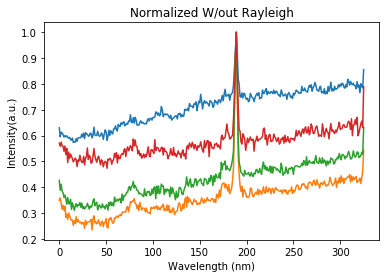

In [12]:
plt.plot(di)
plt.title('Normalized W/out Rayleigh')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity(a.u.)')

In [13]:
dw=dp.drop(columns=['Intensity'])
print(dw)

     Wavelength  Wavelength  Wavelength  Wavelength
0     549.37171   549.37171   549.37171   549.37171
1     549.44183   549.44183   549.44183   549.44183
2     549.51196   549.51196   549.51196   549.51196
3     549.58208   549.58208   549.58208   549.58208
4     549.65220   549.65220   549.65220   549.65220
..          ...         ...         ...         ...
321   571.76997   571.76997   571.76997   571.76997
322   571.83939   571.83939   571.83939   571.83939
323   571.90881   571.90881   571.90881   571.90881
324   571.97823   571.97823   571.97823   571.97823
325   572.04764   572.04764   572.04764   572.04764

[326 rows x 4 columns]


In [14]:
#getting rid of repeat intensity column names
cols = []
count = 1
for column in dw.columns:
    if column=='Wavelength':
        cols.append(f'Wavelength_{count}')
        count+=1
        continue
    cols.append(column)
dw.columns = cols
print(dw)

     Wavelength_1  Wavelength_2  Wavelength_3  Wavelength_4
0       549.37171     549.37171     549.37171     549.37171
1       549.44183     549.44183     549.44183     549.44183
2       549.51196     549.51196     549.51196     549.51196
3       549.58208     549.58208     549.58208     549.58208
4       549.65220     549.65220     549.65220     549.65220
..            ...           ...           ...           ...
321     571.76997     571.76997     571.76997     571.76997
322     571.83939     571.83939     571.83939     571.83939
323     571.90881     571.90881     571.90881     571.90881
324     571.97823     571.97823     571.97823     571.97823
325     572.04764     572.04764     572.04764     572.04764

[326 rows x 4 columns]


In [15]:
#nm-->cm^-1
Excitation_Wavelength=531
a=10**7/Excitation_Wavelength
for columns in dw:
     dw= (dw.apply(lambda x:a-10**7/x))
print(dw)                       

     Wavelength_1  Wavelength_2  Wavelength_3  Wavelength_4
0    18185.014874  18185.014874  18185.014874  18185.014874
1    18187.751940  18187.751940  18187.751940  18187.751940
2    18190.344247  18190.344247  18190.344247  18190.344247
3    18192.802301  18192.802301  18192.802301  18192.802301
4    18195.136591  18195.136591  18195.136591  18195.136591
..            ...           ...           ...           ...
321  18275.415281  18275.415281  18275.415281  18275.415281
322  18275.443384  18275.443384  18275.443384  18275.443384
323  18275.471331  18275.471331  18275.471331  18275.471331
324  18275.499124  18275.499124  18275.499124  18275.499124
325  18275.526759  18275.526759  18275.526759  18275.526759

[326 rows x 4 columns]


In [16]:
#plt.plot(dw)

In [17]:
#join Intensity and Wavelength dataframes
frames=[dw,di]
dc=pd.concat(frames)
print(dc)
#creates NaN values 
#dc= dc.dropna()
#dc.reset_index(drop=True)
#print(dc)
#drops whole row instead of just value and leaves me with no data

     Wavelength_1  Wavelength_2  Wavelength_3  Wavelength_4  Intensity_1  \
0    18185.014874  18185.014874  18185.014874  18185.014874          NaN   
1    18187.751940  18187.751940  18187.751940  18187.751940          NaN   
2    18190.344247  18190.344247  18190.344247  18190.344247          NaN   
3    18192.802301  18192.802301  18192.802301  18192.802301          NaN   
4    18195.136591  18195.136591  18195.136591  18195.136591          NaN   
..            ...           ...           ...           ...          ...   
321           NaN           NaN           NaN           NaN     0.765557   
322           NaN           NaN           NaN           NaN     0.800689   
323           NaN           NaN           NaN           NaN     0.790356   
324           NaN           NaN           NaN           NaN     0.784386   
325           NaN           NaN           NaN           NaN     0.854879   

     Intensity_2  Intensity_3  Intensity_4  
0            NaN          NaN          NaN

In [1]:
#Plotting graph not normalized in cm^-1 
#plt.plot(dc)
#plt.title('Non Normalized')
#plt.xlabel('Wavenumber (cm^-1)')
#plt.ylabel('Intensity(a.u.)')